# Introduction

In the following notebook we review the univariate and multivariate local Geary statistics. The univariate local Geary statistic was originally outlined by [Anselin in 1995](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1538-4632.1995.tb00338.x). A more revent review, as well as the extension to the multivariate context, was provided by [Anselin in 2017](https://geodacenter.github.io/docs/LA_multivariateGeary1.pdf). 

Local Geary statistics focus on identifying areas of similarity (e.g. positive spatial autocorrelation), indicated by small local Geary values. The use case of the local Geary statistic, as well as its implementation in PySAL, is provided below.

# Univariate Local Geary

The univariate local Geary focuses on the squared differences between values of interest in a given focal unit ($x_i$) and its neighboring units ($x_j$). Formally,

Eq 1. $$ c_i = \sum_j w_{ij} (x_i - x_j)^2 $$ 

where $w_{ij}$ is a spatial weights matrix specified to the user's interest (e.g. Queen, Rook, distance-based, etc). Anselin points out that 'because the squared deviations cancel out the mean', the input values need not be standardized. However, for both user convenience and  alignment with the preferred standardization in the multivariate local Geary statistic, the PySAL implementation automatically standardizes the input values. 

We can apply the PySAL implementation of the univariate local Geary statistic to its original implementation in [GeoDa](https://geodacenter.github.io/workbook/6a_local_auto/lab6a.html#local-geary). We load in the Guerry 1833 dataset and focus on the column `Donatns`. The variable captures the total donations to the poor for a given political unit. We import some necessary modules and define `Donatns` as `x`:

In [1]:
import libpysal
import geopandas as gpd
guerry = libpysal.examples.load_example('Guerry')
guerry_ds = gpd.read_file(guerry.get_path('Guerry.shp'))
x = guerry_ds['Donatns']

We now make a Queen-contiguity weights object to describe the relationship between the units.

In [2]:
w = libpysal.weights.Queen.from_dataframe(guerry_ds)

We can now apply the univariate local Geary function on the dataset.

In [3]:
from esda.local_geary import Local_Geary

In [4]:
lG = Local_Geary(connectivity=w).fit(x)

The attributes of interest on the resulting `lG` object are the local Geary values (stored in `localG`).

In [5]:
lG.localG

array([1.82087039e-01, 5.60014026e-01, 9.75294606e-01, 2.15906938e-01,
       6.17372564e-01, 3.84450059e-02, 2.43181756e-01, 9.71802819e-01,
       4.06447101e-02, 7.24722785e-01, 6.30952854e-02, 2.42104497e-02,
       1.59496916e+01, 9.29326006e-01, 9.65188634e-01, 1.32383286e+00,
       3.31775497e-01, 2.99446505e+00, 9.43946814e-01, 2.99570159e+00,
       3.66702291e-01, 2.09592365e+00, 1.46515861e+00, 1.82118455e-01,
       3.10216680e+00, 5.43063937e-01, 5.74532559e+00, 4.79160197e-02,
       1.58993089e-01, 7.18327253e-01, 1.24297849e+00, 8.72629331e-02,
       7.52809650e-01, 4.56515485e-01, 3.86766562e-01, 1.17632604e-01,
       6.90884685e-01, 2.87206102e+00, 4.10455112e-01, 4.04349959e-01,
       1.14211758e-01, 9.59519953e-01, 3.51347976e-01, 7.30240974e-01,
       4.40370938e-01, 7.20360356e-02, 1.66241706e+00, 5.83258909e+00,
       2.30332507e-01, 4.38369688e-01, 8.41461470e-01, 1.52959486e+00,
       4.32157479e-02, 2.08325903e+00, 1.19722984e+00, 1.28169257e+00,
      

The associated simulated p-values are stored in the attribute `p_sim`.

In [6]:
lG.p_sim

array([0.198, 0.052, 0.061, 0.161, 0.49 , 0.002, 0.154, 0.461, 0.021,
       0.284, 0.012, 0.012, 0.148, 0.473, 0.007, 0.027, 0.001, 0.131,
       0.32 , 0.075, 0.002, 0.179, 0.297, 0.094, 0.086, 0.35 , 0.027,
       0.011, 0.033, 0.295, 0.245, 0.011, 0.486, 0.005, 0.121, 0.074,
       0.322, 0.204, 0.307, 0.172, 0.056, 0.374, 0.209, 0.473, 0.293,
       0.007, 0.23 , 0.026, 0.14 , 0.257, 0.296, 0.259, 0.026, 0.067,
       0.436, 0.311, 0.058, 0.29 , 0.033, 0.02 , 0.243, 0.376, 0.456,
       0.132, 0.392, 0.139, 0.081, 0.108, 0.299, 0.187, 0.09 , 0.241,
       0.019, 0.261, 0.008, 0.173, 0.045, 0.042, 0.013, 0.001, 0.038,
       0.498, 0.003, 0.356, 0.257])

We can map these values after placing them back into the dataset.

In [7]:
guerry_ds['localG_Donatns'] = lG.localG
guerry_ds['localG_Donatns_p_sim'] = lG.p_sim

From here you may be interested in mapping the local Geary values...

<AxesSubplot:>

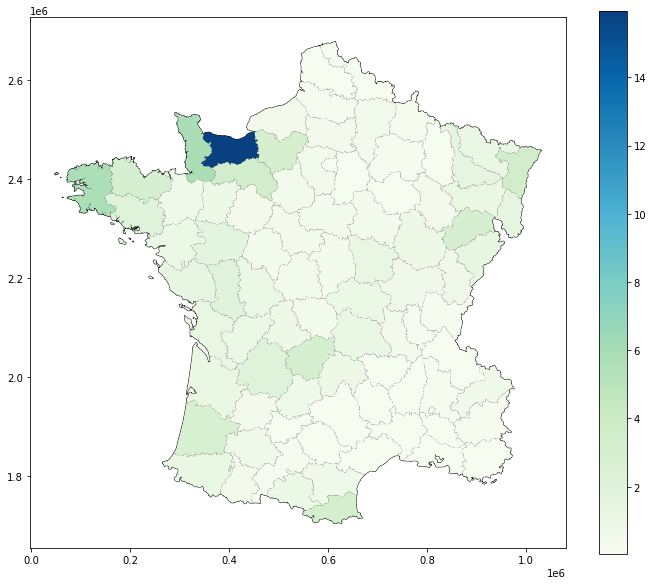

In [8]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
guerry_ds.plot(color='white', edgecolor='black', ax=ax)
guerry_ds.plot(column='localG_Donatns',
               cmap='GnBu',
               legend=True, ax=ax)

Or mapping the accompanying significance values below a certain threshold...

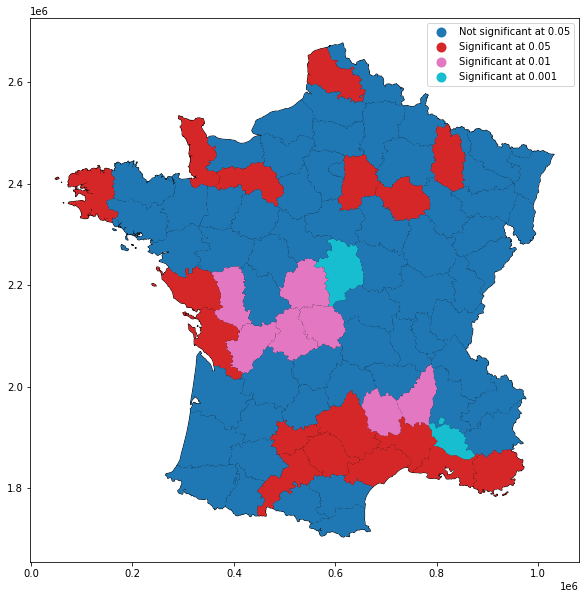

In [9]:
import numpy
guerry_ds['localG_Donatns_p_sim_sig'] = 0
guerry_ds.loc[(guerry_ds['localG_Donatns_p_sim'] <= 0.05), 'localG_Donatns_p_sim_sig'] = 1
guerry_ds.loc[(guerry_ds['localG_Donatns_p_sim'] <= 0.01), 'localG_Donatns_p_sim_sig'] = 2
guerry_ds.loc[(guerry_ds['localG_Donatns_p_sim'] <= 0.001), 'localG_Donatns_p_sim_sig'] = 3

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
guerry_ds.plot(color='white', edgecolor='black', ax=ax)
guerry_ds.plot(column='localG_Donatns_p_sim_sig',
               categorical=True,
               legend=True, 
               ax=ax)

# Create custom legend labels
clusdict={0: 'Not significant at 0.05', 
          1: 'Significant at 0.05',
          2: 'Significant at 0.01',
          3: 'Significant at 0.001'}

def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

replace_legend_items(ax.get_legend(), clusdict)

However, as [Anselin explains](https://geodacenter.github.io/workbook/6a_local_auto/lab6a.html#interpretation-and-significance), what is of substantive interest is identifying areas of similarly high and similarly low values (labeled as positive and negative areas in GeoDa). We provide similar, albeit slightly modified, labels to those in the `.labels` attribute.

## Multivariate Local Geary

The multivariate local Geary is a straightforward extension of the univariate case. Formally, 

Eq 2. $$  c_{k,i} = \sum_{v=1}^k c_{v,i} / k  $$

where $k$ is the number of variables considered, and $c_{v,i}$ is the Local Geary statistic for each variable $v$. For added clarity, Anselin lays out an example of a bivariate calculation of such a statistic: 

Eq 3. $$ c_{k,i} = \sum_j w_{ij} (z_{1,i} - z_{1,j})^2 / k + \sum_j w_{ij} (z_{2,i} - z_{2,j})^2 / k  $$ 

You may note that elements of the Eq 3. strongly resemble a squared distance equation. This is correct, and Anselin notes that inner conceptualization of distance can be replaced:

> As mentioned, other distance measures can be applied, such as a Manhattan distance (absolute differences), or, in general, any Minkowski distance metric. [*Anselin 2017, page 9.*](https://geodacenter.github.io/docs/LA_multivariateGeary1.pdf)

The current PySAL implementation of the local Geary statistic utilizes a squared distance equation. However, the codebase is readily adaptable for other distance functions depending on the needs of a given user.



We now extend the original example with the univariate local Geary to include another variable, specifically the column `Suicids`. 

In [10]:
x1 = guerry_ds['Donatns']
x2 = guerry_ds['Suicids']

We call a new function, `local_geary_mv`, and use the same Queen-based weights as before. 

In [14]:
from esda.local_geary import Local_Geary_MV

ImportError: cannot import name 'Local_Geary_MV' from 'esda.local_geary' (C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\esda\local_geary.py)

In [ ]:
lG_mv = Local_Geary(connectivity=w).fit([x1, x2])

As before, the key attributes of interest to users is `localG` and `p_sim`. 